In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def gen_questions(items):
    return map(lambda x: 'Q'+str(x), items)

questions = {
    'course': list(gen_questions([1, 2, 3, 4, 5, 6, 7, 8])),
    'instructor': list(gen_questions([13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])),
    'personal': list(gen_questions([9, 10, 11, 12]))
}

df = pd.read_csv('data.csv')
# TODO: Filter out rows that have the same value for all questions (or maybe just value 3)

In [39]:
answers = {
    'course': [],
    'instructor': [],
    'personal': []
}
for quest in questions['course']:
    answers['course'].append((quest, df[df[quest] != 3][quest].mean()))
for quest in questions['instructor']:
    answers['instructor'].append((quest, df[df[quest] != 3][quest].mean()))
for quest in questions['personal']:
    answers['personal'].append((quest, df[df[quest] != 3][quest].mean()))

answers

{'course': [('Q1', 2.9041578576462297),
  ('Q2', 3.103889828460981),
  ('Q3', 3.2552773686794305),
  ('Q4', 3.1157742402315485),
  ('Q5', 3.1494782819703957),
  ('Q6', 3.152031135976648),
  ('Q7', 3.0939858777696614),
  ('Q8', 3.059381844731078)],
 'instructor': [('Q13', 3.339255702280912),
  ('Q14', 3.403095238095238),
  ('Q15', 3.401826484018265),
  ('Q16', 3.2384633969557863),
  ('Q17', 3.535195015001154),
  ('Q18', 3.3112232636385484),
  ('Q19', 3.3676967648478997),
  ('Q20', 3.3967988533205924),
  ('Q21', 3.426053822338652),
  ('Q22', 3.44),
  ('Q23', 3.2874969415218986),
  ('Q24', 3.236829268292683),
  ('Q25', 3.435375777884155),
  ('Q26', 3.3137587964086386),
  ('Q27', 3.2151898734177213),
  ('Q28', 3.426093155893536)],
 'personal': [('Q9', 3.238931486519911),
  ('Q10', 3.1304025685354406),
  ('Q11', 3.2572115384615383),
  ('Q12', 3.0501939864209504)]}

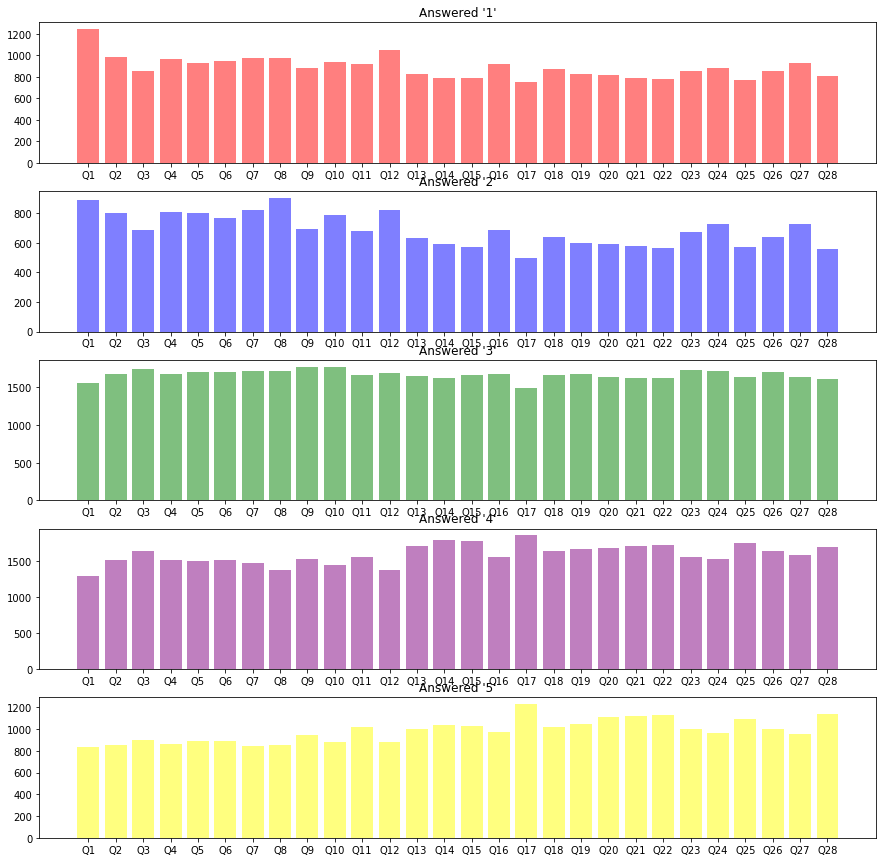

In [123]:
# red - value of 1
# blue - value of 2
# green - value of 3
# purple - value of 4
# yellow - value of 5

plt.subplots(rows, cols, figsize=(15, 15))
questions = list(gen_questions(range(1, 29)))
answers = [1,2,3,4,5]
colours = ['red', 'blue', 'green', 'purple', 'yellow']
for index, answer in enumerate(answers):
    colour = colours[index]
    plt.subplot(rows, cols, index+1)
    hello = []
    for quest in questions:
        counts = df.groupby(quest).agg({'instr': 'count'}).rename(columns={'instr': 'count'})
        counts = counts.loc[answer]['count']
        hello.append(counts)
    plt.bar(questions, hello, color=colour, alpha=0.5)
    plt.title('Answered \'{}\''.format(answer))


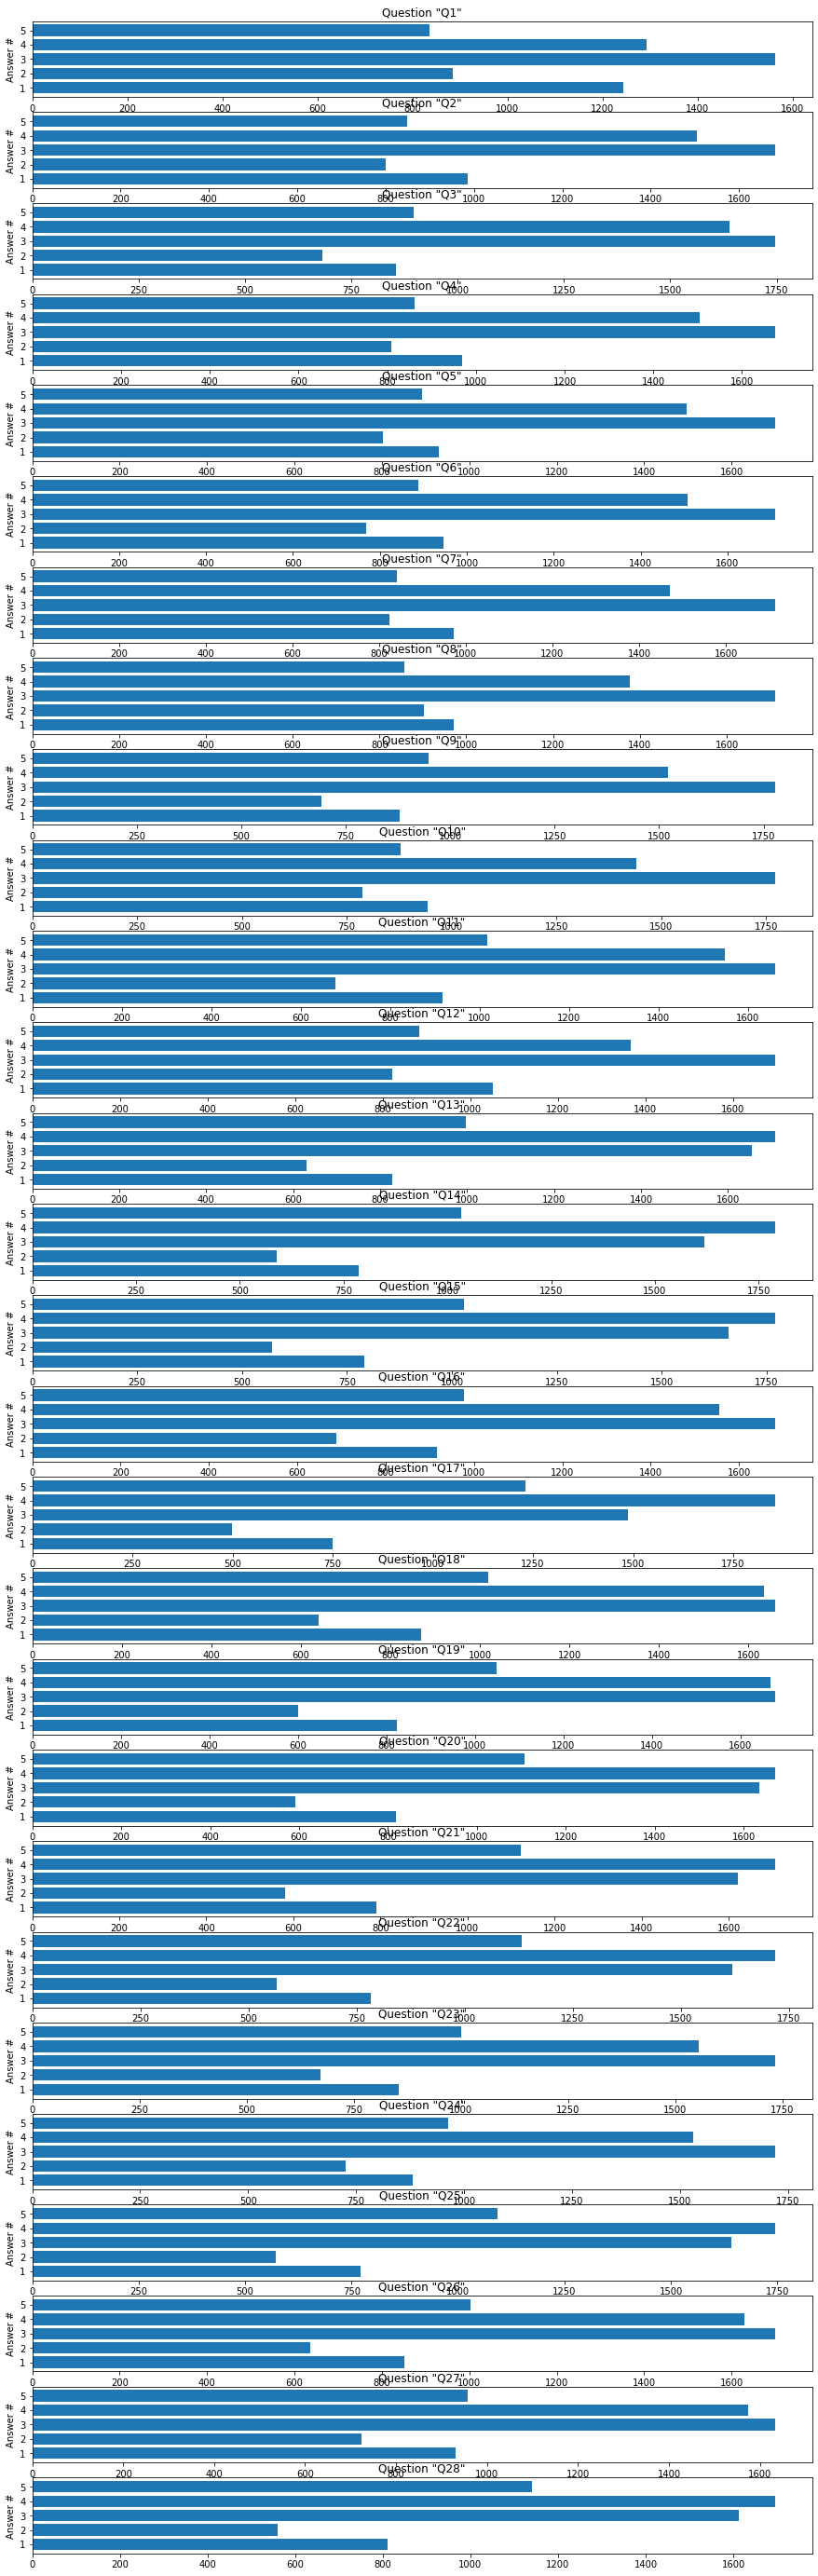

In [145]:
rows = 28
cols = 1
plt.subplots(rows, cols, figsize=(15, 50))
for index, quest in enumerate(questions):
    plt.subplot(rows, cols, index+1)
    temp = df.groupby(quest).agg({quest: 'count'})
    response = temp.index.to_numpy()
    count = temp[quest].to_numpy()
    plt.yticks(answers)
    plt.barh(response, count)

    plt.ylabel('Answer #')
    plt.title(f'Question "{quest}"')

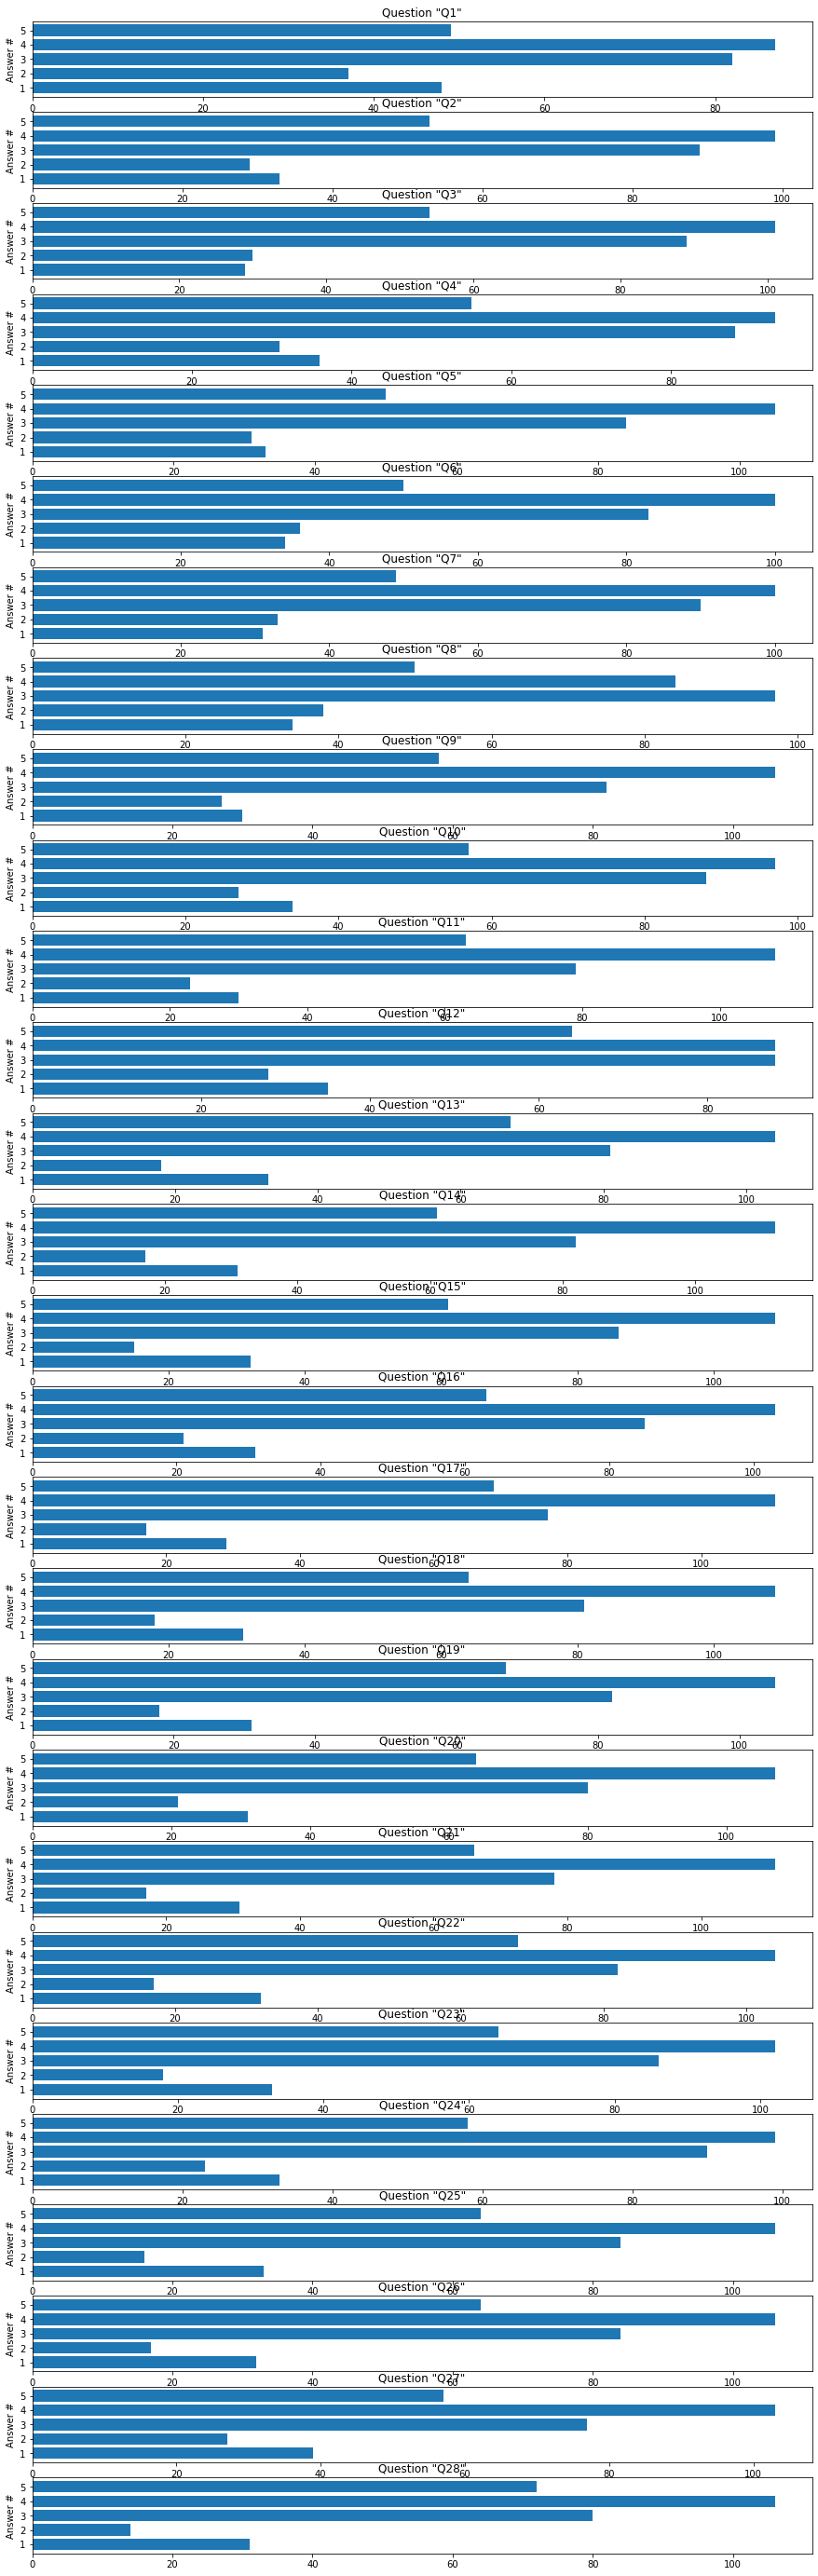

In [2]:
rows = 28
cols = 1
plt.subplots(rows, cols, figsize=(15, 50))
questions = list(gen_questions(range(1, 29)))
answers = [1,2,3,4,5]
colours = ['red', 'blue', 'green', 'purple', 'yellow']

for index, quest in enumerate(questions):
    plt.subplot(rows, cols, index+1)
    temp = df[df['class'] == 1].groupby(quest).agg({quest: 'count'})
    response = temp.index.to_numpy()
    count = temp[quest].to_numpy()
    plt.yticks(answers)
    plt.barh(response, count)

    plt.ylabel('Answer #')
    plt.title(f'Question "{quest}"')